# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


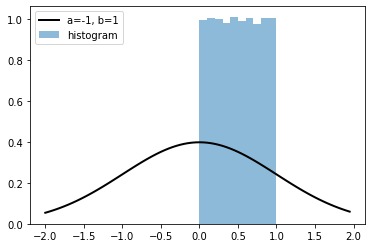

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [4]:
N = 1000
mu= np.mean(data) 
sigma = np.std(data,ddof=0)
print(mu,sigma)

0.500266495134727 0.28874338242094477


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


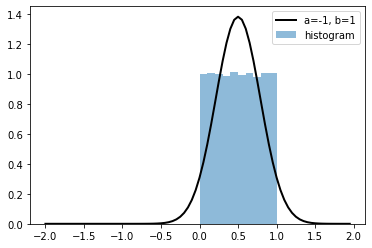

In [5]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


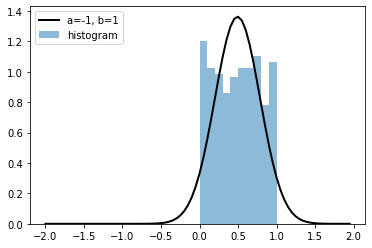

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt


u=stats.uniform()
data = u.rvs(size=1000)

t = np.arange(-2, 2, 0.05)
N = 100000
mu, sigma = stats.norm.fit(data)

num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcję wiarygodnosci ma postać:
$$
L(X,m,\sigma)=\prod\limits_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziany rozkładów normalnych:
$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod\limits_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum\limits_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [7]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [8]:
def mle(x):
    m, sigma = x
    s = 0
    for i in range(data.size):
        s += np.log( Gpdf(data[i], m, abs(sigma)) )
    return -1*s

x0 = np.asarray((0, 1))
print(mle(x0))

1083.2688667737839


# Zadanie 5
Policz MLE dal danych z rozkłdu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [9]:
x0 = np.asarray((0, 1))
print(mle(x0))
x0 = np.asarray((0, 2))
print(mle(x0))
x0 = np.asarray((1, 1))
print(mle(x0))
x0 = np.asarray((0.5, 0.2))
print(mle(x0))

1083.2688667737839
1653.168297156895
1090.4349819666209
382.3353999088067


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [10]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 16
         Gradient evaluations: 4
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [11]:
x0 = np.asarray((0, 1))
min_value = optimize.fmin_cg(mle, x0)
print(min_value)

Optimization terminated successfully.
         Current function value: 190.927190
         Iterations: 10
         Function evaluations: 104
         Gradient evaluations: 26
[0.49283388 0.29287442]


In [12]:
mu= min_value[0]
sigma = np.abs(min_value[1])

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


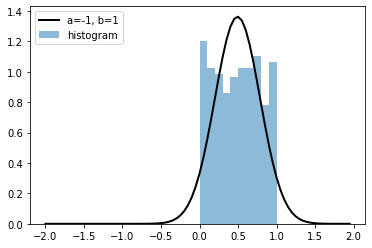

In [13]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [14]:
def SGpdf(x, mu, sigma, tau):
    c = (np.sqrt(2/np.pi))/(sigma+tau)
    if x < mu:
        z = c * np.exp(-(x-mu)*(x-mu) / (2*sigma*sigma))
    else:
        z = c * np.exp(-(x-mu)*(x-mu) / (2*tau*tau))
    return z

In [15]:
SGpdf_vec = np.vectorize(SGpdf)

No handles with labels found to put in legend.


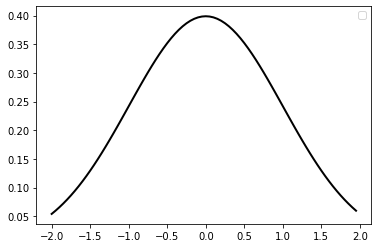

In [16]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1, 1), 'k-', lw=2)
ax.legend()
plt.show()

No handles with labels found to put in legend.


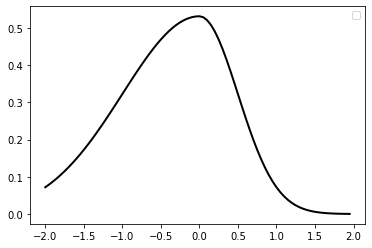

In [17]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1, 1/2), 'k-', lw=2)
ax.legend()
plt.show()

No handles with labels found to put in legend.


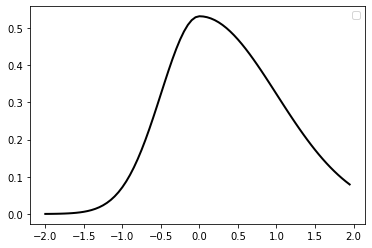

In [18]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1/2, 1), 'k-', lw=2)
ax.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcję wiarygodnosci ma postać:
$$
L(X,m,\sigma,\tau)=\prod\limits_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziany rozkładów Split Normal:
$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod\limits_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum\limits_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [19]:
def SG_mle(x):
    m, sigma, tau = x
    s = 0
    for i in range(data.size):
        s += np.log( SGpdf(data[i], m, abs(sigma), abs(tau)) )
    return -1*s

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [20]:
x0 = np.asarray((0.5, 1, 1))
min_value = optimize.fmin_cg(SG_mle, x0)
print(min_value)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\admin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


         Current function value: 164.989993
         Iterations: 18
         Function evaluations: 616
         Gradient evaluations: 120
[0.04092958 0.02171333 0.54903817]


In [21]:
m = min_value[0]
sigma = min_value[1]
tau = min_value[2]
print((m,sigma,tau))

(0.04092957798379624, 0.021713326638912823, 0.5490381697088328)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


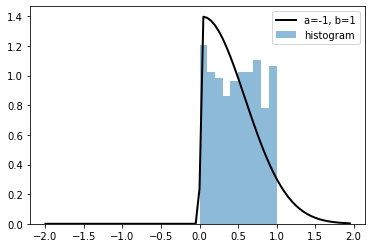

In [22]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t,m, sigma,tau), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 12
Zaiportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normla dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [23]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

In [24]:
x0 = np.asarray((np.mean(data), np.std(data), np.std(data)))
min_value = optimize.fmin_cg(SG_mle, x0)
print(min_value)

         Current function value: 998.625505
         Iterations: 2
         Function evaluations: 321
         Gradient evaluations: 63
[1.28067467 0.19021837 3.54824759]


In [25]:
m = min_value[0]
sigma = np.abs(min_value[1])
tau = np.abs(min_value[2])
print((m,sigma,tau))

(1.2806746687174884, 0.1902183732968279, 3.5482475929682735)


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


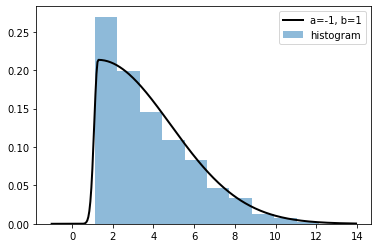

In [26]:
t = np.arange(-1, 14, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t,m, sigma,tau), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


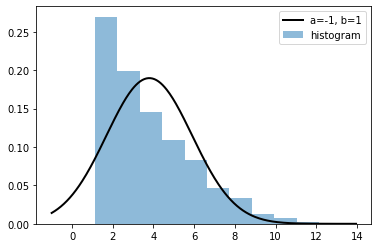

In [27]:
mu, sigma = stats.norm.fit(data)

num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()